In [1]:
from IPython.display import Image

# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn

%matplotlib inline

In [2]:
#遺失值與異常值的補值策略
    #給定一個固定值去填補遺失值
    #由後往前補值 (時間性相關適用)
    #由前往後補值 (時間性相關適用)
    #用現有的資料取平均值、中位數、眾數等進行補值
    #用預測方法補值，迴歸或機器學習: e.g. KNN


In [3]:
#KNNImputer
#sklearn.impute.KNNImputer(*, missing_values=nan, n_neighbors=5, weights='uniform', 
                #metric='nan_euclidean', copy=True, add_indicator=False)
Image(url='http://cumatrixfile.cupoy.com/0000017554EEA1E80000000A6375706F795F72656C656173654349/marathon/1603345870426')

In [4]:
#1. 離散轉連續型資料: e.g. Male/Female >>>1/0


In [5]:
#2. 計算資料點的倆倆距離


In [6]:
#3. 透過 KNN 進行補值
    #n_neighbors = k：取不同數量的鄰近點,最近的 k 個資料點進行補值。
    #weights：依據不同的權重來進行運算 (distance/uniform)
        #uniform(default weights='uniform',): All points in each neighborhood are weighted equally.
        #distanc: Weight points by the inverse of their distance.(距離越近權重越大)
    #類別資料轉換對於 KNN 的影響：若差異大（即種類多），會以各種類資料做為基礎產生補值

In [7]:
#怎麼判斷補值的好壞？
    #MSE
    
    #ŷi：補值結果，yi：真實值
    #MSE 越小代表補值的準確度越高。
Image(url='http://cumatrixfile.cupoy.com/0000017554EEA1E80000000A6375706F795F72656C656173654349/marathon/1603345870446')

#用已知點，套用演算法產生補值，跟原值做比較
#Step1：取無遺失值的資料集
#Step2：隨機取幾個資料點，當作遺失值
#Step3：以 step2 產生的遺失值進行補值
#Step4：計算 MSE 看補值的效果


In [8]:
#用字典產生一組資料
data={'sex': ['Male','Male','Male','Male','Male','Female','Female','Female','Female','Female'],
     'age':[23,40,5,30,1,40,16,27,43,8],
     'height':[180,170,100,176,70,160,170,166,155,np.NAN],
     'weight':[100,68,20,np.NAN,10,np.NAN,50,58,58,17]}
#轉成 dataframe格式 
data=pd.DataFrame(data)
display(data)

,sex,age,height,weight
0,Male,23,180.0,100.0
1,Male,40,170.0,68.0
2,Male,5,100.0,20.0
3,Male,30,176.0,NaN
4,Male,1,70.0,10.0
5,Female,40,160.0,NaN
6,Female,16,170.0,50.0
7,Female,27,166.0,58.0
8,Female,43,155.0,58.0
9,Female,8,NaN,17.0


In [9]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = data.isnull().sum()/len(data)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

        missing_rate
sex              0.0
age              0.0
height           0.1
weight           0.2


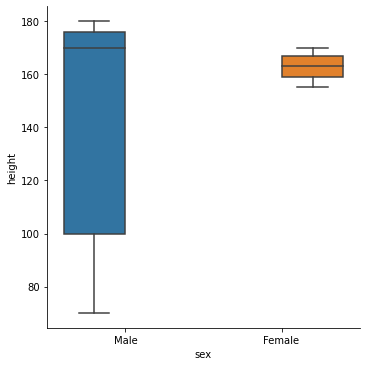

In [10]:
g = sns.catplot(x="sex", y="height", hue="sex",
               data=data,kind="box")
#男生女生的身高特性有差異

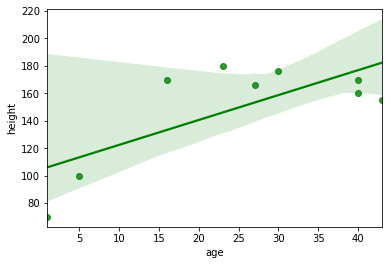

In [11]:
g = sns.regplot(x="age", y="height", color="g",data=data)
#年齡和身高有關連

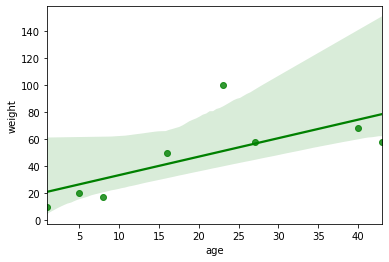

In [12]:
g = sns.regplot(x="age", y="weight", color="g",data=data)
#體重和年紀也有關聯

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


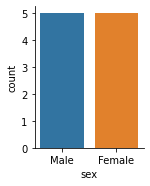

In [13]:
#男生女生個數
g = sns.catplot("sex",
                data=data,
                kind="count", height=2.5, aspect=.8)

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


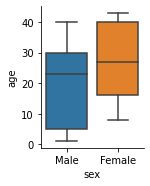

In [14]:
#男生女生中年齡分布
g = sns.catplot("sex",'age',
                data=data,
                kind="box", height=2.5, aspect=.8)
#發現男生女生都有小孩族群

In [15]:
# 細看遺失資料的樣態
missing_index=data.isnull()
display(data[missing_index.values==True])

,sex,age,height,weight
3,Male,30,176.0,NaN
5,Female,40,160.0,NaN
9,Female,8,NaN,17.0


In [16]:
#方法1. 平均值
data_mean = data.copy()
data_mean['weight'].fillna(data_mean['weight'].mean(),inplace=True)
data_mean

,sex,age,height,weight
0,Male,23,180.0,100.000
1,Male,40,170.0,68.000
2,Male,5,100.0,20.000
3,Male,30,176.0,47.625
4,Male,1,70.0,10.000
5,Female,40,160.0,47.625
6,Female,16,170.0,50.000
7,Female,27,166.0,58.000
8,Female,43,155.0,58.000
9,Female,8,NaN,17.000


In [17]:
#方法2.
data_knn = data.copy()


#step1
#透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
data_knn['sex']=le.fit_transform(data_knn['sex'])
display(data_knn)



,sex,age,height,weight
0,1,23,180.0,100.0
1,1,40,170.0,68.0
2,1,5,100.0,20.0
3,1,30,176.0,NaN
4,1,1,70.0,10.0
5,0,40,160.0,NaN
6,0,16,170.0,50.0
7,0,27,166.0,58.0
8,0,43,155.0,58.0
9,0,8,NaN,17.0


In [18]:
#step2, 各點間距離
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(data_knn)))

,0,1,2,3,4,5,6,7,8,9
0,0.000000,37.589892,114.560028,9.309493,143.819331,30.331502,51.478151,44.463468,52.820451,97.399521
1,37.589892,0.000000,91.809586,13.466007,122.004098,11.604597,30.016662,16.911535,18.303005,69.531767
2,114.560028,91.809586,0.000000,92.383260,31.874755,80.216374,76.954532,79.277992,76.902536,5.033223
3,9.309493,13.466007,92.383260,0.000000,126.896283,21.817424,17.625739,12.110601,28.542366,31.144823
4,143.819331,122.004098,31.874755,126.896283,0.000000,113.266647,108.747414,110.440029,106.273233,11.489125
5,30.331502,11.604597,80.216374,21.817424,113.266647,0.000000,30.022214,16.532796,6.733003,45.254834
6,51.478151,30.016662,76.954532,17.625739,108.747414,30.022214,0.000000,14.177447,31.906112,39.208843
7,44.463468,16.911535,79.277992,12.110601,110.440029,16.532796,14.177447,0.000000,19.416488,52.179178
8,52.820451,18.303005,76.902536,28.542366,106.273233,6.733003,31.906112,19.416488,0.000000,62.246821
9,97.399521,69.531767,5.033223,31.144823,11.489125,45.254834,39.208843,52.179178,62.246821,0.000000


In [19]:
# KNN
# 設定 k 值

#k=1
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputerk1 = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputerk1.fit_transform(data_knn))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
df_filled.columns = ['sex','age','height','weight']
display(df_filled)

,sex,age,height,weight
0,1.0,23.0,180.0,100.0
1,1.0,40.0,170.0,68.0
2,1.0,5.0,100.0,20.0
3,1.0,30.0,176.0,100.0
4,1.0,1.0,70.0,10.0
5,0.0,40.0,160.0,58.0
6,0.0,16.0,170.0,50.0
7,0.0,27.0,166.0,58.0
8,0.0,43.0,155.0,58.0
9,0.0,8.0,100.0,17.0


In [20]:
#k=1
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer_k1_d = KNNImputer(n_neighbors=value_neighbors,weights='distance')
df_filled = pd.DataFrame(imputer_k1_d.fit_transform(data_knn))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
df_filled.columns = ['sex','age','height','weight']
display(df_filled)

,sex,age,height,weight
0,1.0,23.0,180.0,100.0
1,1.0,40.0,170.0,68.0
2,1.0,5.0,100.0,20.0
3,1.0,30.0,176.0,100.0
4,1.0,1.0,70.0,10.0
5,0.0,40.0,160.0,58.0
6,0.0,16.0,170.0,50.0
7,0.0,27.0,166.0,58.0
8,0.0,43.0,155.0,58.0
9,0.0,8.0,100.0,17.0


In [21]:
#k=3
value_neighbors=3
imputer_k3 = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer_k3.fit_transform(data_knn))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
df_filled.columns = ['sex','age','height','weight']
display(df_filled)

,sex,age,height,weight
0,1.0,23.0,180.000000,100.000000
1,1.0,40.0,170.000000,68.000000
2,1.0,5.0,100.000000,20.000000
3,1.0,30.0,176.000000,75.333333
4,1.0,1.0,70.000000,10.000000
5,0.0,40.0,160.000000,61.333333
6,0.0,16.0,170.000000,50.000000
7,0.0,27.0,166.000000,58.000000
8,0.0,43.0,155.000000,58.000000
9,0.0,8.0,115.333333,17.000000


In [22]:
#k=3
value_neighbors=3
imputer_k3_d = KNNImputer(n_neighbors=value_neighbors,weights='distance')
df_filled = pd.DataFrame(imputer_k3_d.fit_transform(data_knn))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
df_filled.columns = ['sex','age','height','weight']
display(df_filled)

,sex,age,height,weight
0,1.0,23.0,180.000000,100.000000
1,1.0,40.0,170.000000,68.000000
2,1.0,5.0,100.000000,20.000000
3,1.0,30.0,176.000000,77.883152
4,1.0,1.0,70.000000,10.000000
5,0.0,40.0,160.000000,60.919322
6,0.0,16.0,170.000000,50.000000
7,0.0,27.0,166.000000,58.000000
8,0.0,43.0,155.000000,58.000000
9,0.0,8.0,99.462122,17.000000


In [23]:
import random
complete_data = data_knn.dropna().reset_index(drop=True)
a = random.sample(list(complete_data.index),2) 
missing_data=complete_data.copy()
missing_data['height'].iloc[a]=np.nan
missing_data['weight'].iloc[a]=np.nan
display(missing_data)

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,sex,age,height,weight
0,1,23,180.0,100.0
1,1,40,170.0,68.0
2,1,5,NaN,NaN
3,1,1,70.0,10.0
4,0,16,NaN,NaN
5,0,27,166.0,58.0
6,0,43,155.0,58.0


In [24]:
from sklearn.metrics import mean_squared_error

verify_imputer_1 = pd.DataFrame(imputer_k3_d.fit_transform(missing_data))
verify_imputer_1.rename(columns={0:'sex',1:'age',2:'height',3:'weight',4:'imputed_h',5:'imputed_w'},inplace=True)
display(verify_imputer_1)


y_true1 =complete_data['height']
y_pred1 = verify_imputer_1['height']
MSE_h=mean_squared_error(y_true1, y_pred1)
print(f'MSE_h {MSE_h}')

#這邊的 MSE1 很大的原因，
# 是因為和遺失值旁邊的資料點數不多，對於 KNN 而言資料量要夠多，補值的效果才會比較好。
# 每次 random 的效果不同，


y_true1 =complete_data['weight']
y_pred1 = verify_imputer_1['weight']
MSE_w=mean_squared_error(y_true1, y_pred1)
print(f'MSE_w {MSE_w}')

,sex,age,height,weight
0,1.0,23.0,180.000000,100.000000
1,1.0,40.0,170.000000,68.000000
2,1.0,5.0,99.832889,30.456753
3,1.0,1.0,70.000000,10.000000
4,0.0,16.0,151.257039,67.191198
5,0.0,27.0,166.000000,58.000000
6,0.0,43.0,155.000000,58.000000


MSE_h 50.18950410854237
MSE_w 57.840136611523995


In [25]:
verify_imputer_2 = pd.DataFrame(imputer_k3.fit_transform(missing_data))
verify_imputer_2.rename(columns={0:'sex',1:'age',2:'height',3:'weight'},inplace=True)
display(verify_imputer_2)


y_true1 =complete_data['height']
y_pred1 = verify_imputer_2['height']
MSE_h=mean_squared_error(y_true1, y_pred1)
print(f'MSE_h {MSE_h}')

#這邊的 MSE1 很大的原因，
# 是因為和遺失值旁邊的資料點數不多，對於 KNN 而言資料量要夠多，補值的效果才會比較好。
# 每次 random 的效果不同，


y_true1 =complete_data['weight']
y_pred1 = verify_imputer_2['weight']
MSE_w=mean_squared_error(y_true1, y_pred1)
print(f'MSE_w {MSE_w}')

,sex,age,height,weight
0,1.0,23.0,180.000000,100.0
1,1.0,40.0,170.000000,68.0
2,1.0,5.0,138.666667,56.0
3,1.0,1.0,70.000000,10.0
4,0.0,16.0,138.666667,56.0
5,0.0,27.0,166.000000,58.0
6,0.0,43.0,155.000000,58.0


MSE_h 353.8412698412698
MSE_w 190.28571428571428


# HW

In [26]:
data = pd.read_csv('Titanic_train.csv')
data.head(),data.shape

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

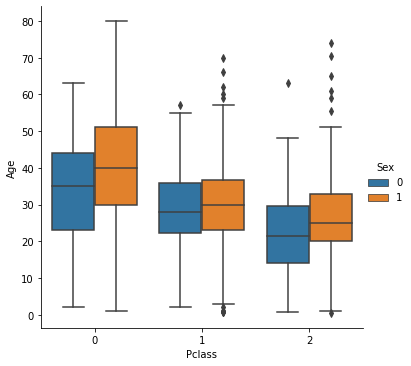

In [27]:
#step1：觀察 Age 和 Pclass 和 Sex 是否有關連性?
le = preprocessing.LabelEncoder()

data['Pclass'] = le.fit_transform(data['Pclass'])
data['Sex'] = le.fit_transform(data['Sex'])

g = sns.catplot(x="Pclass", y="Age", hue="Sex",
               data=data, kind='box')

#有

In [28]:
#step2：如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 
target = data[['Age','Pclass','Sex']]
target_backup = target.copy()
miss = target.isnull().sum()/len(target)
miss.sort_values(ascending=False)
pd.DataFrame(miss,columns=['missing_rate'])

,missing_rate
Age,0.198653
Pclass,0.000000
Sex,0.000000


In [29]:
value_neighbors=3
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,weights='distance')
df_filled = pd.DataFrame(imputer.fit_transform(target))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
df_filled.columns = ['Age','Pclass','Sex']
display(df_filled)

,Age,Pclass,Sex
0,22.0,2.0,1.0
1,38.0,0.0,0.0
2,26.0,2.0,0.0
3,35.0,0.0,0.0
4,35.0,2.0,1.0
...,...,...,...
886,27.0,1.0,1.0
887,19.0,0.0,0.0
888,19.0,2.0,0.0
889,26.0,0.0,1.0


In [30]:
target_backup.dropna(inplace=True)
sample = random.sample(list(target_backup.index),200) 
len(sample)

200

In [31]:
verify = target_backup.copy()
modify = target_backup.copy()
modify['Age'][sample] = np.nan
len(modify)

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


714

In [32]:
imputer = KNNImputer(n_neighbors=3,weights='distance')
modify = pd.DataFrame(imputer.fit_transform(modify)).rename(columns={0:'Age',1:'Pclass',2:'Sex'})
modify

,Age,Pclass,Sex
0,19.000000,2.0,1.0
1,38.000000,0.0,0.0
2,26.000000,2.0,0.0
3,48.333333,0.0,0.0
4,35.000000,2.0,1.0
...,...,...,...
709,39.000000,2.0,0.0
710,27.000000,1.0,1.0
711,19.000000,0.0,0.0
712,26.000000,0.0,1.0


In [33]:
y_true1 = verify['Age']
y_pred1 = modify['Age']
MSE_distance=mean_squared_error(y_true1, y_pred1)
print(f'MSE_distance {MSE_distance}')

MSE_distance 67.60058009648304


In [34]:
verify = target_backup.copy()
modify = target_backup.copy()
modify['Age'][sample] = np.nan
len(modify)
imputer = KNNImputer(n_neighbors=3,weights='uniform')
modify = pd.DataFrame(imputer.fit_transform(modify)).rename(columns={0:'Age',1:'Pclass',2:'Sex'})
modify
y_true1 = verify['Age']
y_pred1 = modify['Age']
MSE_uniform=mean_squared_error(y_true1, y_pred1)
print(f'MSE_uniform {MSE_uniform}')

MSE_uniform 67.60058009648304


/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
